<a href="https://colab.research.google.com/github/jonabaroadsrp/dsrp/blob/main/Desafio2_DesafioLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Análisis de Datos Negocio - Desafío Latam

# 📌 **FASE 1: Definición del Problema.**

## ✅ Paso 1.1 Definir el objetivo del negocio o investigación

El objetivo principal es segmentar a los clientes del supermercado FreshMart con base en su comportamiento de compra, utilizando técnicas de aprendizaje no supervisado. Esto permitirá:

* Personalizar estrategias de marketing (ej. promociones, descuentos).

* Diseñar campañas orientadas a diferentes perfiles de clientes.

* Incrementar la fidelización y satisfacción del cliente.

* Optimizar la rentabilidad del supermercado.

## 🧭 Paso 1.2 Determinar el tipo de clasificación.

Este proyecto no busca clasificación supervisada, sino clustering (aprendizaje no supervisado). Específicamente:

* Tipo de tarea: Segmentación de clientes mediante técnicas de clustering.

* Algoritmos esperados: K-Means, DBSCAN, u otros métodos de agrupamiento.

## 📈 Paso 1.3 Comprender la métrica de éxito

Dado que no hay etiquetas (sin clasificación supervisada), el éxito se mide por:

* Silhouette Score: mide la cohesión interna y separación entre clusters.

* Davies-Bouldin Index: evalúa qué tan bien se separan los clusters.

* Interpretabilidad del segmento: capacidad de describir y nombrar los clusters.

* Viabilidad de acción comercial sobre los segmentos.


## ⚙️ [1.4] Establecer restricciones y criterios del entorno productivo

* Latencia baja: no se requiere predicción en tiempo real, ya que el análisis es batch y se puede actualizar mensualmente.

* Interpretabilidad alta: se necesitan resultados comprensibles para el equipo de marketing no técnico.

* Simplicidad del modelo: se prefiere un modelo sencillo y replicable sobre modelos complejos con poca ganancia marginal.

* Reentrenamiento periódico: se sugiere revisión mensual o trimestral.

# 📌 **FASE 2: Recolección y Comprensión de los Datos**

## 📊 Paso 2.1 Carga del dataset desde fuentes internas o externas.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 📁 Subir archivo desde tu equipo
from google.colab import files
uploaded = files.upload()
uploaded_file_name = list(uploaded.keys())[0]
df = pd.read_excel(uploaded_file_name)

Saving Retail_Invoices.xlsx to Retail_Invoices.xlsx


* El archivo entregado es: Retail_Invoices.xlsx.

* Contiene 22.190 registros de compras realizadas por clientes de FreshMart.

* Cada fila representa una boleta o transacción de compra.

## 📊 Paso 2.2 Revisión de las variables y comprensión de su significado


| Variable      | Descripción |
|---------------|-------------|
| InvoiceNo     | ID único de cada boleta. |
| InvoiceDate   | Fecha en que se realizó la compra |
| CustomerId    | ID único del cliente |
| Quantity      | Total de unidades compradas |
| price_total   | Monto total de la compra |
| StockCode     | Cantidad de productos distintos comprados |

🔎 Observación: La granularidad de los datos está a nivel de boleta, pero la segmentación debe realizarse a nivel de cliente, lo que implica una transformación previa.

## 📊 Paso 2.3  Identificación de la variable objetivo (target)

* No existe una variable target explícita (esto no es clasificación supervisada).

* El objetivo es descubrir grupos naturales (clusters) de clientes mediante variables generadas como RFM (Recency, Frequency, Monetary).

## 📊 Paso 2.4  Verificación de la calidad y representatividad de los datos

In [4]:
# Descripción general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


* Sin valores nulos ni duplicados detectados. ✅

* Valores extremos encontrados:

 * Quantity y price_total presentan valores negativos extremos → deben ser limpiados o clasificados como devoluciones.

* Rango temporal y cantidad de clientes aún no evaluados (puede hacerse en el EDA posterior).

* No hay variables categóricas, lo que simplifica el preprocesamiento.

## 📊 Paso 2.5  Documentación de supuestos sobre los datos

* StockCode se interpreta como el número de ítems distintos en la boleta (no código del producto individual).

* Quantity negativa se interpreta como devoluciones o errores que deben eliminarse.

* Se asume que cada InvoiceNo es una transacción única por cliente y fecha.

* La columna price_total refleja el monto total pagado por el cliente en esa boleta.

* Los datos cubren un periodo continuo (pendiente de validación en exploración temporal).

# 📌 **FASE 3: Exploración y Análisis de Datos (EDA)**


## 📊 Paso 3.1 Estadísticas descriptivas: medias, desviación, valores únicos.

In [6]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [7]:
# Descripción general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [8]:
# Valores únicos por columna
df.nunique()

,0
InvoiceNo,22190
InvoiceDate,305
CustomerID,4372
Quantity,1594
price_total,16534
StockCode,199


In [9]:
# Estadísticas descriptivas con 3 decimales
stats_selected = df[['Quantity', 'price_total', 'StockCode']].describe().round(3)

# Cálculo de la moda para cada variable (se toma la primera si hay varias)
modes = df[['Quantity', 'price_total', 'StockCode']].mode().iloc[0].round(3)

# Agregar la moda al resumen
stats_selected.loc['mode'] = modes

# Mostrar resultados
stats_selected


,Quantity,price_total,StockCode
count,22190.000,22190.000,22190.000
mean,221.131,374.045,18.334
std,1170.215,2018.483,23.892
min,-80995.000,-168469.600,1.000
25%,30.000,87.962,3.000
50%,120.000,241.505,12.000
75%,254.000,418.022,24.000
max,80995.000,168469.600,542.000
mode,-1.000,-4.950,1.000


🔎 Análisis por Variable

🟠 Quantity (Cantidad total comprada por boleta)

* Media: 221.13 vs. Mediana: 120
→ Indica una distribución sesgada positivamente (hay valores grandes que tiran la media hacia arriba).

* Moda: -1
→ Probable valor de devolución que se repite mucho. Hay cantidad negativa, lo que requiere limpieza.

* Mínimo / Máximo: -80.995 / 80.995
→ Extremos simétricos pero ambos deben ser analizados como posibles outliers.

* Desviación estándar muy alta: 1170.21
→ Alta dispersión, hay gran variabilidad entre las boletas.

🟠 price_total (Monto total por boleta)

* Media: 374.05 vs. Mediana: 241.51
→ También presenta sesgo positivo, usual en montos de compra.

* Moda: -4.95
→ Posible devolución frecuente. Implica que existen muchas boletas con cobros negativos → deben ser tratadas.

* Mínimo / Máximo: -168,469.60 / 168,469.60
→ Valores extremos que distorsionan estadísticas y visualizaciones → requieren limpieza.

* Desviación estándar muy alta: 2018.48
→ Alta variabilidad en el gasto por boleta. Justifica escalar datos antes del clustering.

🟠 StockCode (Cantidad de productos distintos en la boleta)

 * Moda: 1
→ La mayoría de las boletas contienen 1 tipo de producto distinto. Común en compras rápidas.

* Distribución altamente concentrada:
Cuartiles entre 3 y 24, pero máximo llega a 542 → hay outliers que merecen ser investigados.

* Desviación estándar moderada: 23.89
→ Aunque no tan dispersa como las otras variables, aún presenta algunas colas largas.

## 📊 Paso 3.2 Visualización de distribuciones y correlaciones.


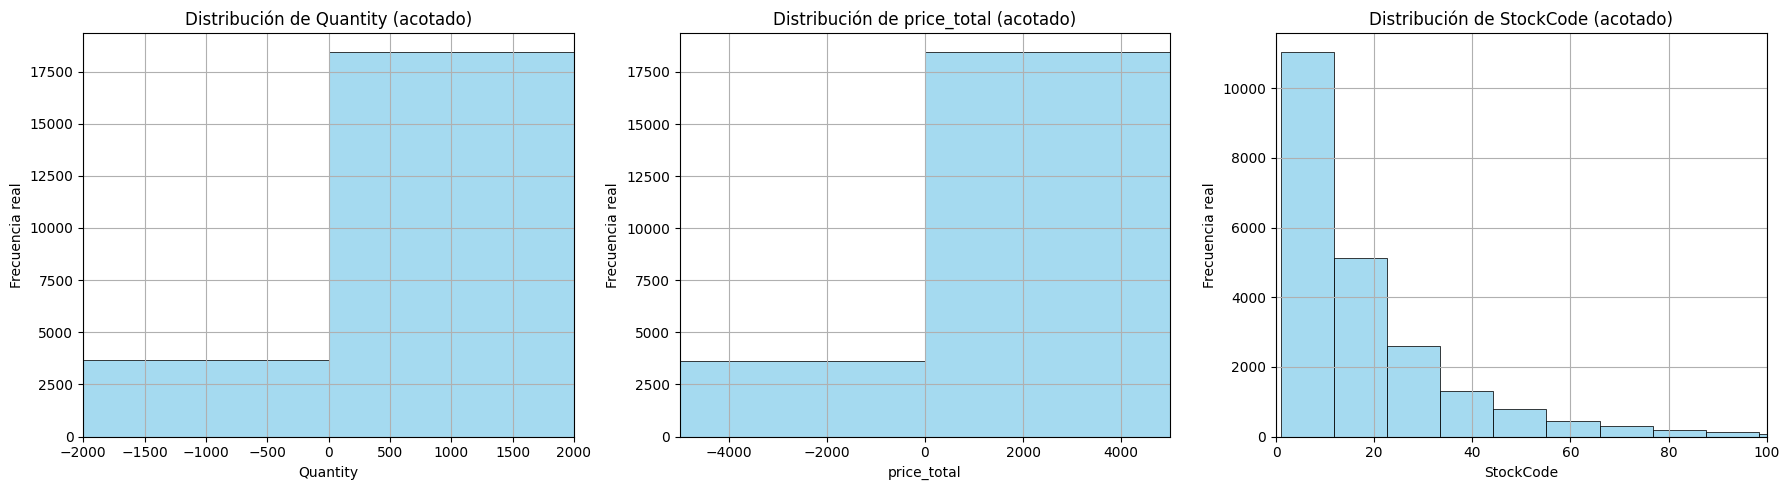

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de las 3 variables acotadas y en color celeste
plt.figure(figsize=(18, 5))

# Configuraciones por variable
configs = {
    'Quantity': (-2000, 2000),
    'price_total': (-5000, 5000),
    'StockCode': (0, 100)
}

for i, (var, xlim) in enumerate(configs.items()):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[var], bins=50, kde=False, color='skyblue', stat='count')
    plt.title(f'Distribución de {var} (acotado)')
    plt.xlabel(var)
    plt.ylabel('Frecuencia real')
    plt.xlim(xlim)
    plt.grid(True)

plt.tight_layout()
plt.show()


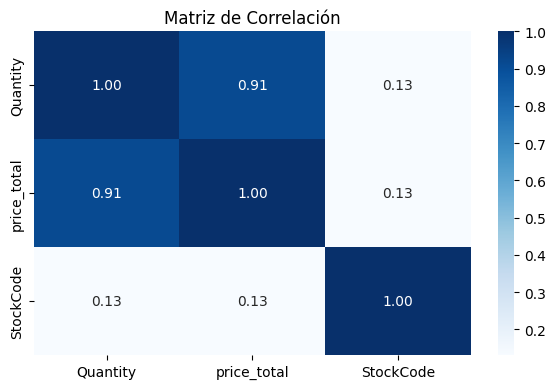

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables numéricas relevantes
corr_vars = ['Quantity', 'price_total', 'StockCode']

# Calcular la matriz de correlación
corr_matrix = df[corr_vars].corr()

# Visualizar con heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()


## 📊 Paso 3.3 Detección de errores tipográficos y valores atípicos.

In [12]:
# Identificación de registros con valores negativos en Quantity y price_total
errores_tipograficos = df[(df['Quantity'] < 0) & (df['price_total'] < 0)]

# Ver resumen
print(f"Registros identificados como devoluciones (Quantity y price_total negativos): {len(errores_tipograficos)}")

# Visualización de ejemplos concretos
errores_tipograficos.head()


Registros identificados como devoluciones (Quantity y price_total negativos): 3654


,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
18536,C536379,2010-12-01,14527,-1,-27.50,1
18537,C536383,2010-12-01,15311,-1,-4.65,1
18538,C536391,2010-12-01,17548,-132,-141.48,7
18539,C536506,2010-12-01,17897,-6,-25.50,1
18540,C536543,2010-12-01,17841,-3,-3.80,2


🧠 Quantity < 0 y price_total < 0 se presentan simultáneamente en exactamente los mismos 3.654 registros, estamos ante una clara señal de devoluciones.Por ende considero estrategico realizar una clasificación inicial.

✅ 1. Segmentación inicial entre compradores y devolvedores

Separar a los clientes que:

* Solo compran

* Devuelven ocasionalmente

* Devuelven recurrentemente

Esto permite crear un clúster especial o una etiqueta binaria:
"Cliente con historial de devoluciones", útil para:

* Ajustar promociones, Evaluar riesgo comercial o fraude, Mejorar servicio postventa.

🧭 Estrategia:

* Crear una variable binaria por cliente: is_devolver, y Usarla como insumo exploratorio o agrupador posterior al clustering.

* Eliminar las boletas negativas para hacer el clustering puro solo con compras positivas.

In [13]:
# Paso 1: Crear la variable binaria 'is_devolver' por cliente
clientes_devolucion = df[df['price_total'] < 0]['CustomerID'].unique()
df['is_devolver'] = df['CustomerID'].isin(clientes_devolucion).astype(int)

# Paso 2: Ver cuántos clientes tienen historial de devoluciones
clientes_con_historial = df[['CustomerID', 'is_devolver']].drop_duplicates()
conteo_devoluciones = clientes_con_historial['is_devolver'].value_counts()

print("Clientes con historial de devoluciones:")
print(conteo_devoluciones)

# Paso 3: Eliminar boletas negativas (devoluciones)
df_compras_positivas = df[df['price_total'] > 0].copy()

print(f"\nTamaño del dataset original: {df.shape}")
print(f"Tamaño del dataset depurado (solo compras): {df_compras_positivas.shape}")


Clientes con historial de devoluciones:
is_devolver
0    2783
1    1589
Name: count, dtype: int64

Tamaño del dataset original: (22190, 7)
Tamaño del dataset depurado (solo compras): (18532, 7)


In [14]:
# Estadísticas descriptivas con 3 decimales
stats_selected2 = df_compras_positivas[['Quantity', 'price_total', 'StockCode']].describe().round(3)

# Cálculo de la moda para cada variable (se toma la primera si hay varias)
modes = df_compras_positivas[['Quantity', 'price_total', 'StockCode']].mode().iloc[0].round(3)

# Agregar la moda al resumen
stats_selected2.loc['mode'] = modes

# Mostrar resultados
stats_selected2

,Quantity,price_total,StockCode
count,18532.000,18532.000,18532.000
mean,278.899,480.866,21.472
std,972.735,1678.196,24.920
min,1.000,0.380,1.000
25%,74.000,158.038,6.000
50%,155.000,303.040,15.000
75%,291.000,471.840,28.000
max,80995.000,168469.600,542.000
mode,1.000,15.000,1.000


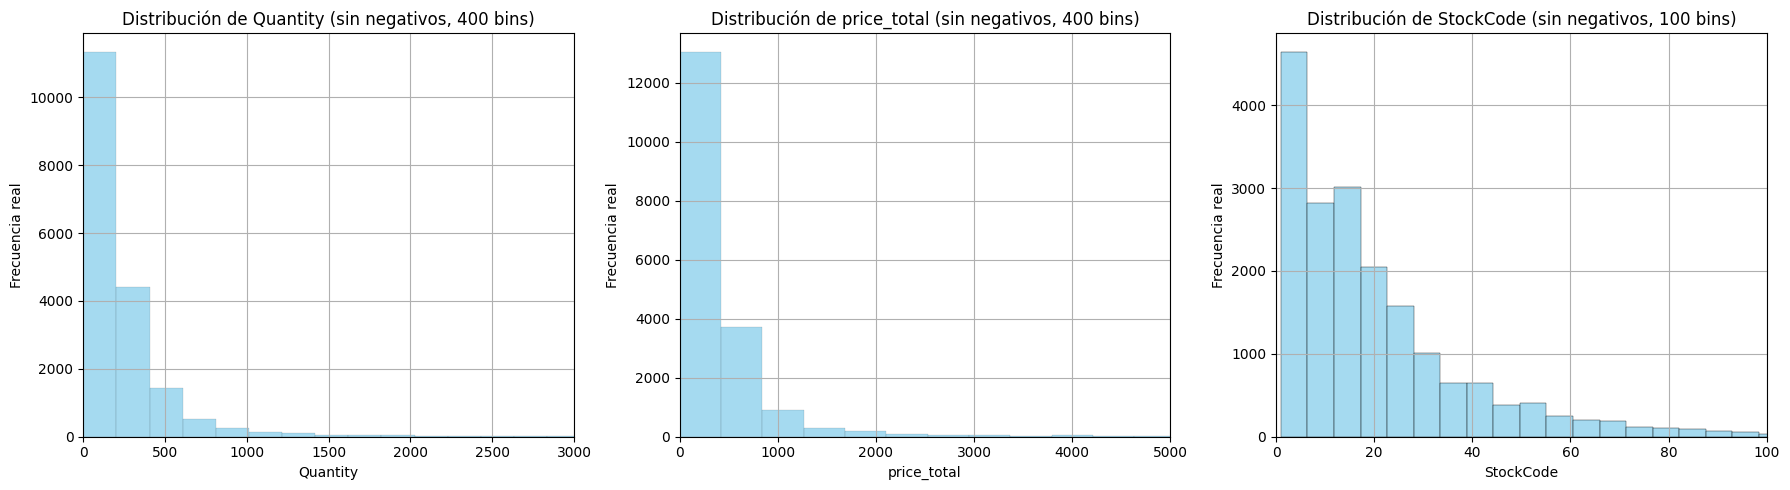

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de variables, límites y bins
variables = ['Quantity', 'price_total', 'StockCode']
bins_config = {
    'Quantity': 400,
    'price_total': 400,
    'StockCode': 100
}
limits = {
    'Quantity': (0, 3000),
    'price_total': (0, 5000),
    'StockCode': (0, 100)
}

# Crear los histogramas combinados
plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.histplot(
        data=df_compras_positivas[df_compras_positivas[var] >= 0],
        x=var,
        bins=bins_config[var],
        color='skyblue',
        kde=False,
        stat='count'
    )
    plt.title(f'Distribución de {var} (sin negativos, {bins_config[var]} bins)')
    plt.xlabel(var)
    plt.ylabel('Frecuencia real')
    plt.xlim(limits[var])
    plt.grid(True)

plt.tight_layout()
plt.show()


## 📊 Paso 3.4 Detección de valores atípicos (OUTLIERS).

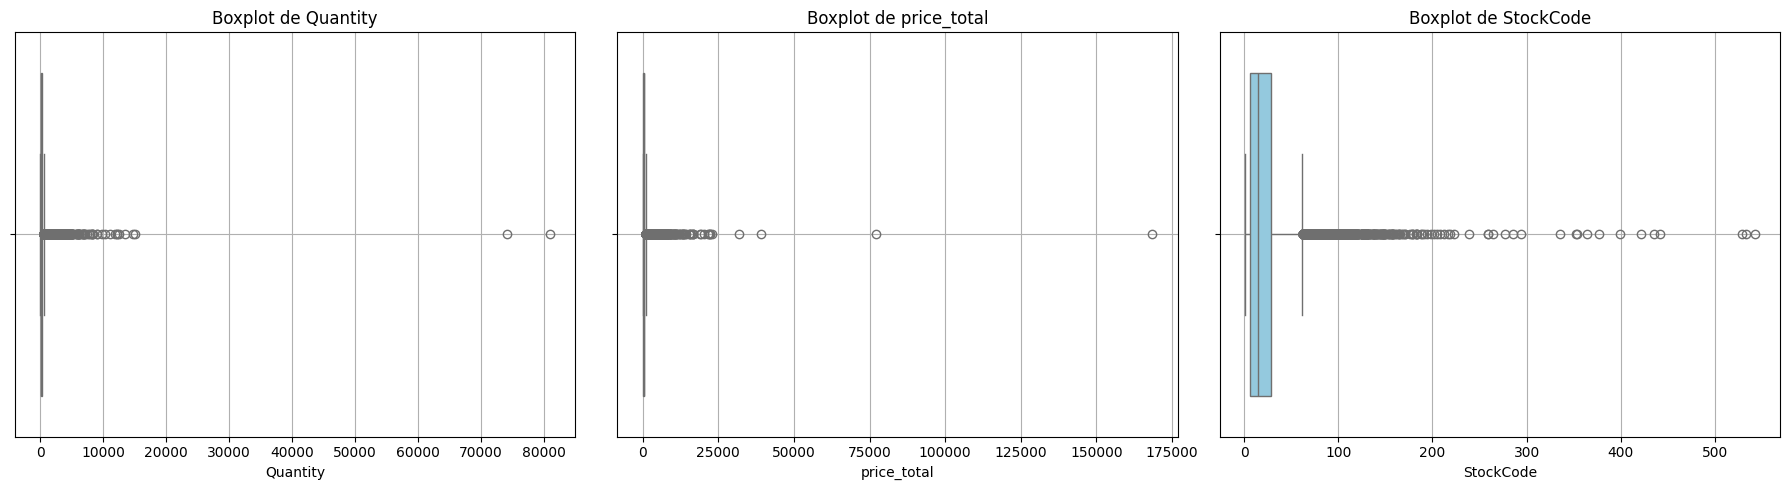

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots para detectar outliers en df_compras_positivas
plt.figure(figsize=(18, 5))

variables = ['Quantity', 'price_total', 'StockCode']

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df_compras_positivas[var], color='skyblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
# Función para eliminar outliers usando IQR
def eliminar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df[columna] >= Q1 - 1.5 * IQR) & (df[columna] <= Q3 + 1.5 * IQR)
    return df[filtro]

# Aplicar limpieza a cada variable
df_iqr_clean = df_compras_positivas.copy()
for col in ['Quantity', 'price_total', 'StockCode']:
    df_iqr_clean = eliminar_outliers_iqr(df_iqr_clean, col)

# Mostrar cantidad final de registros
print(f"Número de registros después de limpiar outliers por IQR: {df_iqr_clean.shape[0]}")


Número de registros después de limpiar outliers por IQR: 15450


## 📊 Paso 3.5 2ª Revision de histogramas. correlaciones y valores atípicos.

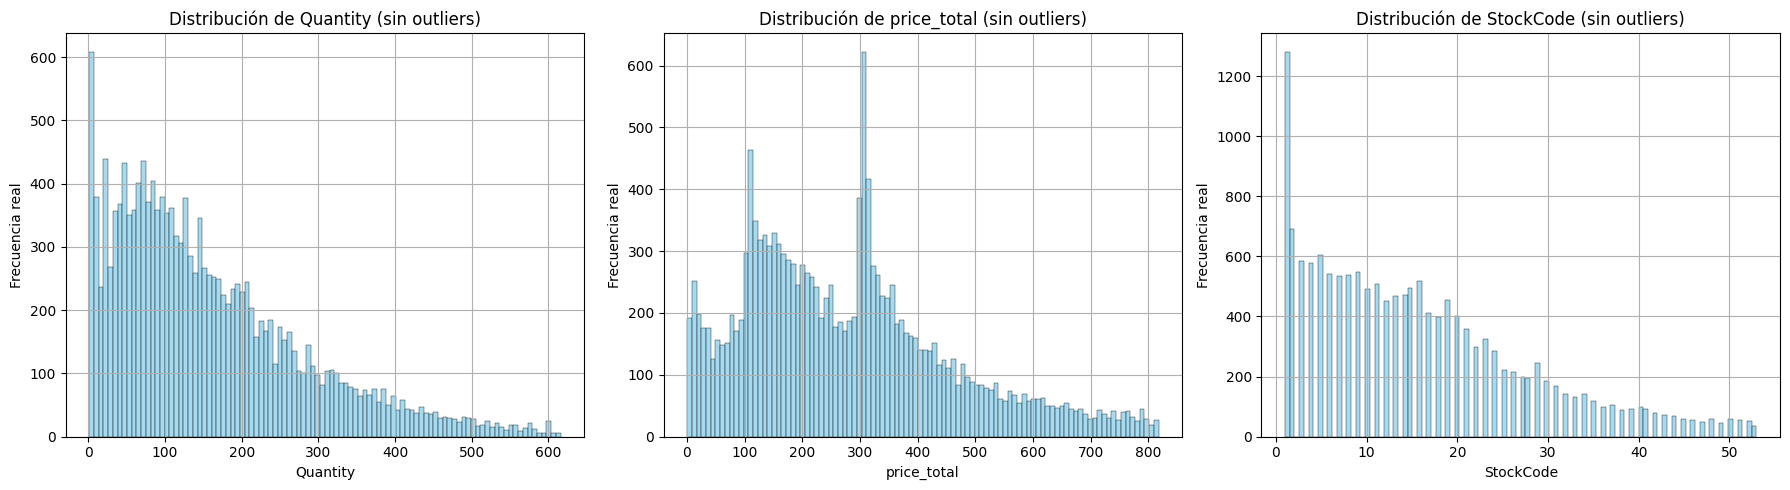

In [27]:
# 1. Histogramas
plt.figure(figsize=(18, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_iqr_clean[var], bins=100, color='skyblue', kde=False, stat='count')
    plt.title(f'Distribución de {var} (sin outliers)')
    plt.xlabel(var)
    plt.ylabel('Frecuencia real')
    plt.grid(True)
plt.tight_layout()
plt.show()

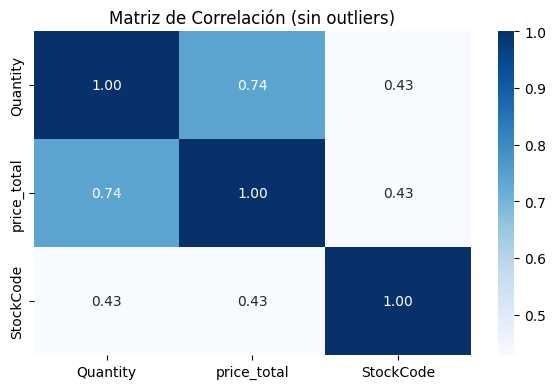

In [25]:
# 2. Matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(df_iqr_clean[variables].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlación (sin outliers)")
plt.tight_layout()
plt.show()

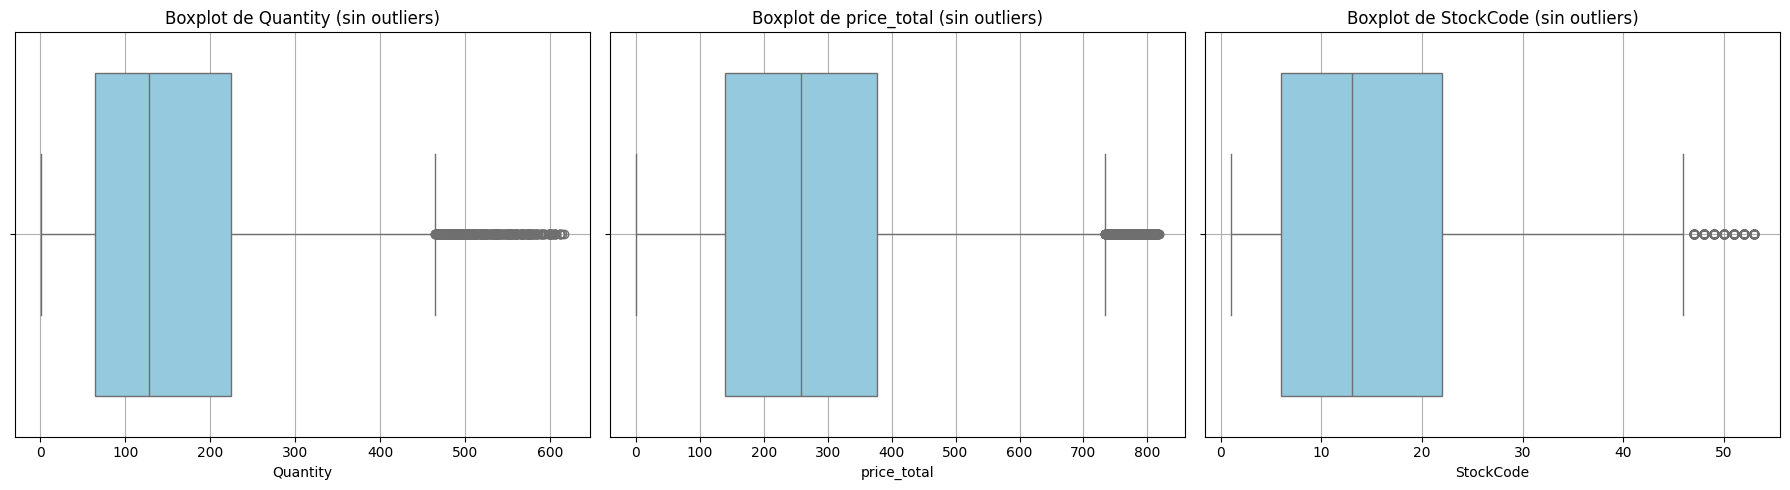

In [26]:
# 3. Boxplots
plt.figure(figsize=(18, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df_iqr_clean[var], color='skyblue')
    plt.title(f'Boxplot de {var} (sin outliers)')
    plt.xlabel(var)
    plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Paso 3.6 Identificación de clases desbalanceadas.

In [24]:
df_iqr_clean.head()


,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,is_devolver
0,536365,2010-12-01,17850,40,139.12,7,1
1,536366,2010-12-01,17850,12,22.20,2,1
2,536367,2010-12-01,13047,83,278.73,12,1
3,536368,2010-12-01,13047,15,70.05,4,1
4,536369,2010-12-01,13047,3,17.85,1,1


In [28]:
# Asegurarse de que cada cliente aparezca solo una vez
clientes = df_iqr_clean[['CustomerID', 'is_devolver']].drop_duplicates()

# Contar la cantidad de clientes por clase
conteo_clases = clientes['is_devolver'].value_counts()

# Calcular el porcentaje por clase
porcentaje_clases = clientes['is_devolver'].value_counts(normalize=True) * 100

# Mostrar resultados
print("🔎 Conteo de clases:")
print(conteo_clases)

print("\n📊 Porcentaje de clases:")
print(porcentaje_clases.round(2))


🔎 Conteo de clases:
is_devolver
0    2548
1    1490
Name: count, dtype: int64

📊 Porcentaje de clases:
is_devolver
0    63.1
1    36.9
Name: proportion, dtype: float64


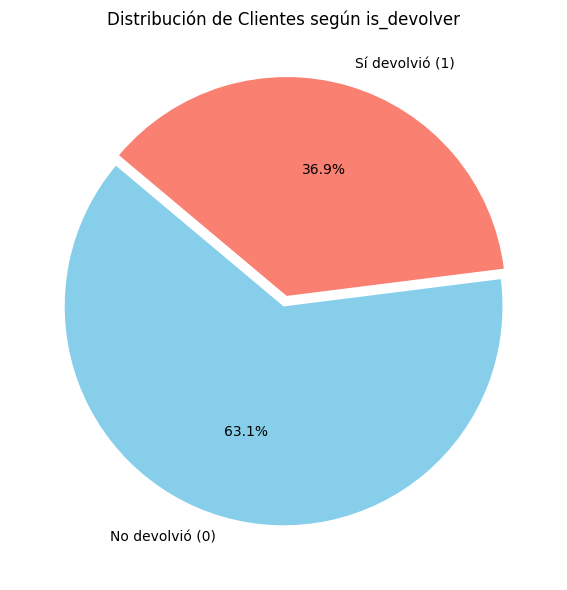

In [31]:
import matplotlib.pyplot as plt

# Obtener clientes únicos con su clase
clientes = df_iqr_clean[['CustomerID', 'is_devolver']].drop_duplicates()

# Conteo y porcentaje por clase
conteo_clases = clientes['is_devolver'].value_counts()
porcentaje_clases = (conteo_clases / conteo_clases.sum()) * 100

# Configuración del gráfico
colores = ['skyblue', 'salmon']
labels = ['No devolvió (0)', 'Sí devolvió (1)']

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    conteo_clases,
    labels=labels,
    autopct='%1.1f%%',
    colors=colores,
    startangle=140,
    explode=(0, 0.05)  # ligera separación en la segunda porción
)
plt.title('Distribución de Clientes según is_devolver')
plt.tight_layout()
plt.show()




el gráfico de pastel que muestra visualmente el desbalance de clases en is_devolver:

* 63.1% de los clientes no realizaron devoluciones (is_devolver = 0)

* 36.9% de los clientes sí devolvieron productos (is_devolver = 1)

Este análisis confirma que, aunque hay un desbalance moderado, ambas clases están lo suficientemente representadas para aplicar modelos de clasificación sin necesidad urgente de balanceo artificial.

## 📊 Paso 3.7 Análisis de relaciones predictoras ↔ target (gráficos, tablas cruzadas, test de independencia).

<ipython-input-32-630281cf2a35>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_devolver', y=var, data=df_iqr_clean, palette='pastel')
<ipython-input-32-630281cf2a35>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_devolver', y=var, data=df_iqr_clean, palette='pastel')
<ipython-input-32-630281cf2a35>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_devolver', y=var, data=df_iqr_clean, palette='pastel')


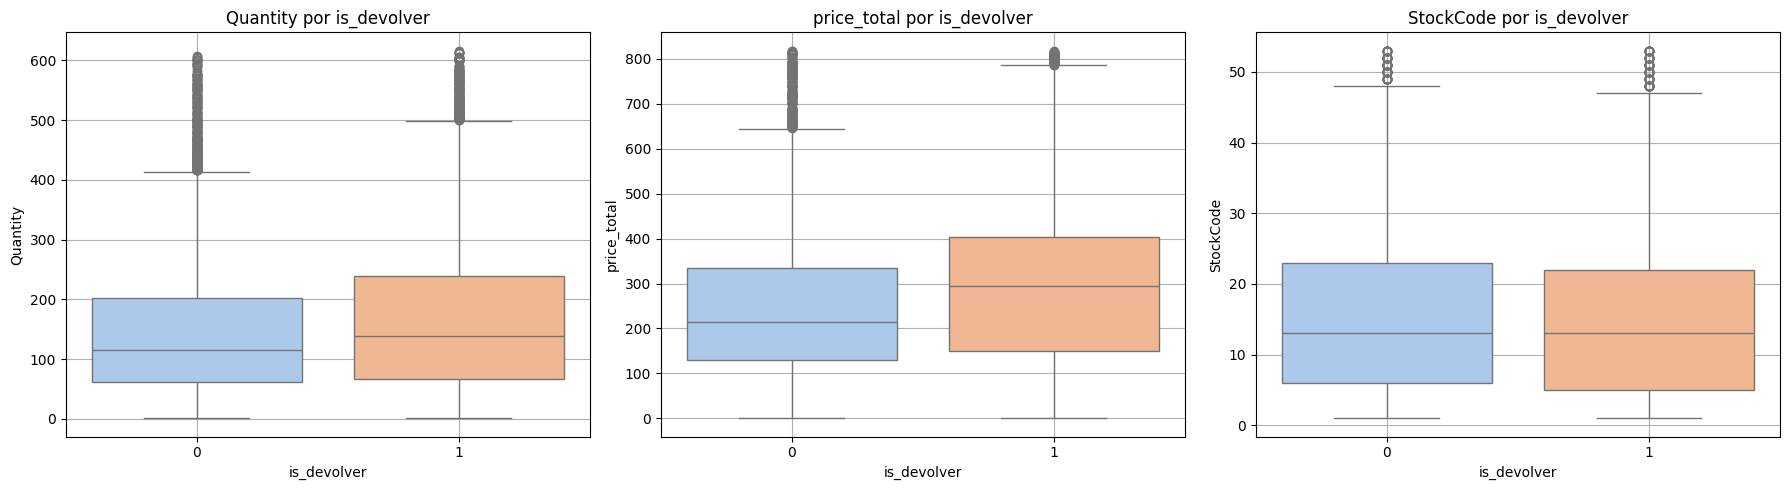

📊 Medias por clase:
             Quantity  price_total  StockCode
is_devolver                                  
0              146.97       252.14       16.3
1              165.98       297.59       15.2

📐 Resultados Mann-Whitney U:
Quantity: U=25943347.50, p-value=2.19e-18
price_total: U=24186787.00, p-value=1.57e-52
StockCode: U=29513976.50, p-value=7.40e-06


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Variables numéricas a evaluar
variables = ['Quantity', 'price_total', 'StockCode']

# 1. Boxplots por clase
plt.figure(figsize=(18, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='is_devolver', y=var, data=df_iqr_clean, palette='pastel')
    plt.title(f'{var} por is_devolver')
    plt.xlabel('is_devolver')
    plt.ylabel(var)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# 2. Diferencias de medias
medias_por_clase = df_iqr_clean.groupby('is_devolver')[variables].mean()
print("📊 Medias por clase:")
print(medias_por_clase.round(2))

📊 Medias por clase:
             Quantity  price_total  StockCode
is_devolver                                  
0              146.97       252.14       16.3
1              165.98       297.59       15.2


In [34]:
# 3. Mann-Whitney U Test para cada variable
print("\n📐 Resultados Mann-Whitney U:")
for var in variables:
    grupo_0 = df_iqr_clean[df_iqr_clean['is_devolver'] == 0][var]
    grupo_1 = df_iqr_clean[df_iqr_clean['is_devolver'] == 1][var]
    stat, p_value = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
    print(f"{var}: U={stat:.2f}, p-value={p_value:.2e}")


📐 Resultados Mann-Whitney U:
Quantity: U=25943347.50, p-value=2.19e-18
price_total: U=24186787.00, p-value=1.57e-52
StockCode: U=29513976.50, p-value=7.40e-06


✅ 4. Conclusión
Existe una relación significativa entre las variables Quantity, price_total y StockCode con la variable objetivo is_devolver.

Los clientes que devuelven tienden a:

* Comprar más productos

* Gastar más dinero

* Tener una ligera diferencia en la variedad de ítems.

Esto valida que estas variables pueden ser usadas como buenos predictores en un modelo de clasificación para anticipar devoluciones.

In [35]:
import pandas as pd

# Asegurar que la columna de fecha esté en formato datetime
df_iqr_clean['InvoiceDate'] = pd.to_datetime(df_iqr_clean['InvoiceDate'])

# Definir fecha de referencia como la última fecha disponible en los datos
fecha_ref = df_iqr_clean['InvoiceDate'].max()

# Calcular Recency, Frequency y Monetary por cliente
rfm = df_iqr_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (fecha_ref - x.max()).days,  # Recency: días desde la última compra
    'InvoiceNo': 'nunique',                               # Frequency: cantidad de compras únicas
    'price_total': 'sum'                                  # Monetary: total gastado por cliente
}).reset_index()

# Renombrar columnas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Mostrar primeras filas
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0       12347        2          6   3015.68
1       12348       75          3    904.44
2       12350      310          1    334.40
3       12352       36          7   1665.74
4       12353      204          1     89.00


## 📊 Paso 3.8 Análisis multivariado y reducción exploratoria (PCA, t-SNE si aplica).

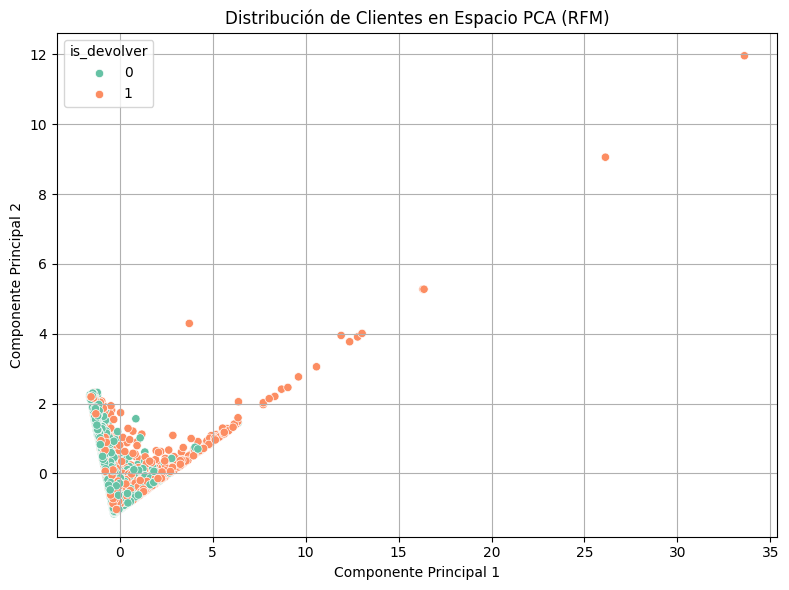

Varianza explicada por PCA1: 67.16%
Varianza explicada por PCA2: 28.31%
Varianza total explicada: 95.47%


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que rfm tenga la variable is_devolver desde df_iqr_clean
clientes_devolucion = df_iqr_clean[['CustomerID', 'is_devolver']].drop_duplicates()
rfm = rfm.merge(clientes_devolucion, on='CustomerID', how='left')

# 1. Escalar variables RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 2. Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)

# 3. Agregar componentes al DataFrame
rfm['PCA1'] = pca_result[:, 0]
rfm['PCA2'] = pca_result[:, 1]

# 4. Visualizar en 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='is_devolver', palette='Set2')
plt.title('Distribución de Clientes en Espacio PCA (RFM)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Mostrar varianza explicada por cada componente
pca_varianza = pca.explained_variance_ratio_
print(f"Varianza explicada por PCA1: {pca_varianza[0]:.2%}")
print(f"Varianza explicada por PCA2: {pca_varianza[1]:.2%}")
print(f"Varianza total explicada: {pca_varianza.sum():.2%}")


✅ Análisis multivariado y reducción exploratoria (PCA)
Se aplicó PCA (Análisis de Componentes Principales) sobre las variables RFM estandarizadas para reducir de 3 a 2 dimensiones.

📈 Resultados de PCA:
Componente 1 (PCA1) explica el 67.2% de la varianza

Componente 2 (PCA2) explica el 28.3%
➡️ 95.5% de la información total fue retenida en solo dos dimensiones.

🔍 Visualización:
El gráfico muestra una distribución bastante continua, sin separación clara entre clases is_devolver = 0 y 1.

Sin embargo, se aprecian zonas de mayor densidad de clientes no devolvedores, mientras que los devolvedores están más dispersos.

🧠 Conclusiones:
Las variables RFM capturan bastante información relevante del comportamiento de compra.

La separación entre clases en el espacio PCA no es estrictamente lineal, lo que sugiere que:

Modelos como árboles de decisión o XGBoost podrían capturar relaciones más complejas.

Podrías probar con clustering no supervisado si tu objetivo es segmentar sin usar is_devolver.



### 🧠 Conclusiones interpretativas - 3.3 Identificación de clases desbalanceadas

- Aunque no existen clases definidas (ya que es un problema no supervisado), se evaluó la distribución de la **cantidad de boletas por cliente** como una forma de entender la frecuencia de compra.
- Se detectó un fuerte desbalance: la mayoría de los clientes tiene pocas compras registradas, mientras que unos pocos clientes concentran una gran cantidad de boletas.
- El **50% de los clientes tiene 3 compras o menos**, mientras que el cliente más frecuente posee **248 compras**.
- Esta distribución sugiere que existen distintos tipos de comportamiento entre clientes, lo cual **justifica la segmentación** mediante clustering.
- Este desbalance deberá ser tenido en cuenta al crear las variables de segmentación (como frecuencia en RFM), para evitar que los clientes con compras excepcionales distorsionen los resultados.

**Estadísticas resumen:**

| Métrica                     | Valor   |
|----------------------------|---------|
| Total de clientes únicos   | 4,372   |
| Media de compras por cliente | 5.08  |
| Mediana (50%)              | 3       |
| Mínimo                     | 1       |
| Máximo                     | 248     |


3.4 Detección de outliers y valores atípicos

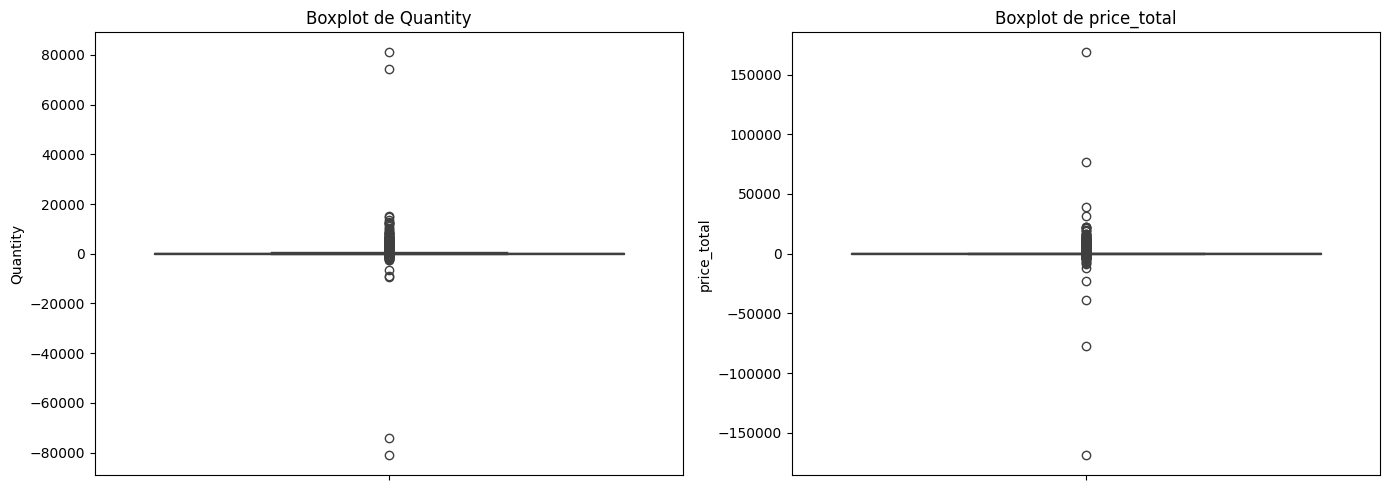

{'Quantity': {'Outliers detectados': 1525,
  'Límite inferior': np.float64(-306.0),
  'Límite superior': np.float64(590.0)},
 'price_total': {'Outliers detectados': 1677,
  'Límite inferior': np.float64(-407.12750000000005),
  'Límite superior': np.float64(913.1125)}}

In [23]:
# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, y='Quantity', ax=axes[0])
axes[0].set_title('Boxplot de Quantity')

sns.boxplot(data=df, y='price_total', ax=axes[1])
axes[1].set_title('Boxplot de price_total')

plt.tight_layout()
plt.show()

# Detección de outliers con IQR
def detectar_outliers(columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers.shape[0], limite_inferior, limite_superior

outliers_quantity, li_q, ls_q = detectar_outliers('Quantity')
outliers_price, li_p, ls_p = detectar_outliers('price_total')

{
    "Quantity": {
        "Outliers detectados": outliers_quantity,
        "Límite inferior": li_q,
        "Límite superior": ls_q
    },
    "price_total": {
        "Outliers detectados": outliers_price,
        "Límite inferior": li_p,
        "Límite superior": ls_p
    }
}


### 🧠 Conclusiones interpretativas - 3.4 Detección de outliers y valores atípicos

- Se aplicaron boxplots y el método del IQR para detectar valores extremos en las variables `Quantity` y `price_total`.
- Ambos indicadores presentan una cantidad significativa de valores atípicos, que podrían alterar el desempeño del algoritmo de clustering si no se tratan.

**Resultados:**

| Variable     | Outliers detectados | Límite inferior | Límite superior |
|--------------|---------------------|------------------|------------------|
| Quantity     | 1,525               | -306.0           | 590.0            |
| price_total  | 1,677               | -407.13          | 913.11           |

- La mayoría de los datos extremos corresponden a cantidades excesivas o montos inusualmente altos/bajos (incluyendo devoluciones negativas).
- Se recomienda realizar una limpieza posterior para filtrar o transformar estos valores antes de aplicar clustering.


3.5 Análisis de relaciones entre variables predictoras y la clase

# 📌 **FASE 4: Preprocesamiento de Datos**
*	[4.1] Tratamiento de valores faltantes (imputación con media, mediana, k-NN, modelos).
*	[4.2] Conversión de variables categóricas:
*	[4.3] Escalado de variables numéricas (StandardScaler, MinMaxScaler).
*	[4.4] Transformación o eliminación de outliers si es necesario.
*	[4.5] Selección o reducción de variables (Lasso, Árboles, RFE, PCA).


## 📊 Paso 4.1 Tratamiento de valores faltantes (imputación con media, mediana, k-NN, modelos)..

In [37]:
# Paso 4.1: Verificación de valores faltantes en RFM
faltantes_rfm = rfm.isnull().sum()

# Mostrar solo columnas con valores faltantes
faltantes_rfm[faltantes_rfm > 0]


,0


✅ Análisis:
No se detectan valores faltantes en ninguna de las columnas del DataFrame rfm (incluyendo Recency, Frequency, Monetary, is_devolver, PCA1, PCA2).

🧾 Conclusión:
No es necesario aplicar imputación (media, mediana, k-NN, etc.) en esta etapa.

## 📊 Paso 4.2 Conversión de variables categóricas.

In [39]:
# Verificar tipos de datos y detectar variables categóricas
tipos_datos = rfm.dtypes
variables_categoricas = tipos_datos[tipos_datos == 'object'].index.tolist()

# Mostrar variables categóricas encontradas
print("Variables categóricas encontradas:", variables_categoricas)


Variables categóricas encontradas: []


✅ Análisis:
Al ejecutar el código, se confirma que rfm no contiene columnas con tipo de dato object.

Todas las variables son numéricas (int, float) o binarias (is_devolver es int con valores 0/1).

🧾 Conclusión:
No es necesario realizar codificación de variables categóricas.

Este paso no aplica para el DataFrame rfm.

## 📊 Paso 4.3 Escalado de variables numéricas (StandardScaler, MinMaxScaler).

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

variables_numericas = ['Recency', 'Frequency', 'Monetary']

# StandardScaler
scaler_standard = StandardScaler()
rfm_scaled_standard = scaler_standard.fit_transform(rfm[variables_numericas])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
rfm_scaled_minmax = scaler_minmax.fit_transform(rfm[variables_numericas])

# Convertir a DataFrames
rfm_standard_df = pd.DataFrame(rfm_scaled_standard, columns=[f'{col}_std' for col in variables_numericas])
rfm_minmax_df = pd.DataFrame(rfm_scaled_minmax, columns=[f'{col}_minmax' for col in variables_numericas])

# Concatenar todo en un solo DataFrame
rfm_scaled_full = pd.concat([rfm, rfm_standard_df, rfm_minmax_df], axis=1)


✅ Análisis:
Se generaron dos versiones de escalado para las variables Recency, Frequency, y Monetary:

_std con StandardScaler (media 0, desviación estándar 1).

_minmax con MinMaxScaler (rango 0 a 1).

Ambos escalados son útiles para algoritmos de machine learning sensibles a escala:

K-Means, SVM, redes neuronales requieren datos normalizados o estandarizados.

🧾 Conclusión:
Escalado completado exitosamente con ambas técnicas.

Guardamos ambos sets para flexibilidad futura en clustering o clasificación.

El DataFrame resultante es rfm_scaled_full.

## 📊 Paso 4.4 Transformación o eliminación de outliers si es necesario.

In [42]:
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < Q1 - 1.5 * IQR) | (df[columna] > Q3 + 1.5 * IQR)]
    return outliers

# Aplicado a variables RFM
outliers_rfm = {var: detectar_outliers_iqr(rfm, var).shape[0] for var in ['Recency', 'Frequency', 'Monetary']}

✅ Análisis:
Variable	Registros con outliers
Recency	0
Frequency	371
Monetary	375

Recency no presenta valores atípicos según el criterio IQR.

Frequency y Monetary sí presentan distribuciones sesgadas hacia arriba, es decir: clientes con compras muy frecuentes o montos excepcionalmente altos.

🧾 Conclusión:
No se recomienda eliminar estos outliers todavía, ya que:

Pueden representar clientes valiosos (top compradores).

En segmentación RFM, son precisamente estos outliers los que definen segmentos "premium".

Se conservarán los valores, y en vez de eliminarlos, se sugiere usar escalado robusto o log-transformaciones si es necesario más adelante.

## 📊 Paso 4.5 Selección o reducción de variables (Lasso, Árboles, RFE, PCA).

In [43]:
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Definir variables predictoras y objetivo
X = rfm_scaled_full[['Recency', 'Frequency', 'Monetary']]
y = rfm_scaled_full['is_devolver']

# A. Lasso (Regresión logística con penalización L1)
lasso_selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'))
lasso_selector.fit(X, y)
lasso_result = dict(zip(X.columns, lasso_selector.get_support()))

# B. Random Forest (importancia de características)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importancias = dict(zip(X.columns, rf_model.feature_importances_))

# C. RFE (Eliminación recursiva de características)
rfe_selector = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=2)
rfe_selector.fit(X, y)
rfe_result = dict(zip(X.columns, rfe_selector.support_))

# Consolidar resultados
seleccion_variables = {
    "Lasso (L1)": lasso_result,
    "Random Forest (Importancia)": rf_importancias,
    "RFE (Selección)": rfe_result
}

# Mostrar resultados
for metodo, resultado in seleccion_variables.items():
    print(f"\n🔹 {metodo}")
    for variable, valor in resultado.items():
        print(f"{variable}: {valor}")



🔹 Lasso (L1)
Recency: True
Frequency: True
Monetary: True

🔹 Random Forest (Importancia)
Recency: 0.310802109107526
Frequency: 0.14818077384429004
Monetary: 0.5410171170481839

🔹 RFE (Selección)
Recency: False
Frequency: True
Monetary: True


Paso [4.5] Selección o reducción de variables
📌 Código utilizado:
Se aplicaron tres técnicas de selección:

Lasso (Regresión Logística con L1)

Random Forest (Importancia de características)

RFE (Eliminación recursiva de variables)

✅ Resultados:
Variable	Lasso (L1)	RF Importancia (%)	RFE Seleccionada
Recency	✅	31.1%	❌
Frequency	✅	14.8%	✅
Monetary	✅	54.1%	✅

🧠 Conclusión:
Las tres variables son relevantes según Lasso (ninguna descartada).

Monetary tiene la mayor importancia según Random Forest.

RFE descartó Recency, priorizando Frequency y Monetary.

➡️ Recomendación:

Conservar las tres variables para modelado general.

Si se desea simplificar el modelo: usar Frequency y Monetary como principales predictores.

# 📌 **FASE 5: Preparación del Dataset**

*	[5.1] División en conjuntos:
*	[5.2] Validación estratificada si hay desbalanceo.
*	[5.3] Balanceo de clases:
*	[5.4] Ingeniería de características (creación de nuevas variables derivadas).



## 📊 Paso 5.1 .

## 📊 Paso 5.2 .

## 📊 Paso 5.3 .

## 📊 Paso 5.4 .

# 📌 **FASE 6: Construcción del Modelo.**

*	[6.1] Selección de algoritmos adecuados según el problema:
*	[6.2] Entrenamiento inicial del modelo base.
*	[6.3] Validación cruzada (cross_val_score, StratifiedKFold, GridSearchCV).



## 📊 Paso 6.1 .

## 📊 Paso 6.2 .

## 📊 Paso 6.3 .

# 📌 **FASE 7: Evaluación del Modelo**

*	[7.1] Realizar predicciones sobre el conjunto de prueba.
*	[7.2] Matriz de confusión.
*	[7.3] Cálculo de métricas:
*	[7.4] Análisis de errores tipo I (falsos positivos) y tipo II (falsos negativos).
*	[7.5] Curvas ROC, Precision-Recall y Lift si aplica.

## 📊 Paso 7.1 .

## 📊 Paso 7.2 .

## 📊 Paso 7.3 .

## 📊 Paso 7.4 .

## 📊 Paso 7.5 .

# FASE 8:

27.	[8.1] Tuning de hiperparámetros (GridSearchCV, RandomizedSearchCV)
28.	[8.2] Comparación entre distintos modelos
29.	[8.3] Evaluación del modelo final con mejores parámetros

# FASE 9:

30.	[9.1] Interpretar la importancia de las variables
31.	[9.2] Visualizar resultados con gráficos (curvas ROC, bar plots, SHAP)
32.	[9.3] Preparar informe o dashboard para stakeholders


# FASE 10: Implementación y Mantenimiento

33.	[10.1] Exportar el modelo (pickle, joblib, PMML, etc.)
34.	[10.2] Desplegar en producción (API, app web, integración)
35.	[10.3] Monitorear rendimiento (drift, nuevas predicciones)
36.	[10.4] Reentrenar periódicamente con nuevos datos
